In [ ]:
from math import sqrt
from skimage import data,io
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

def normalize(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)


image = io.imread('C:/Users/juanr/Documents/mediciones microscopio metalografico/amarillo_11.tif')
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=15, num_sigma=1, threshold=.001)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=15, threshold=.01)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=15, threshold=.000000000000000000000000000000000001)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [16]:
from skimage import data, feature,io
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

from skimage import data, feature
img = data.coins()
blobs_container = feature.blob_doh(img)

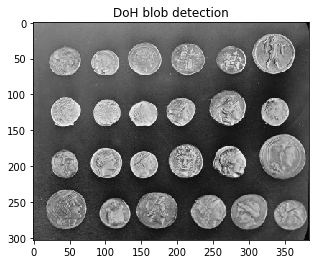

In [19]:
plt.imshow(img,cmap='gray')
plt.title('DoH blob detection')

for (i,j,k) in blobs_container:
        c = plt.Circle((j, i),k, color='red', linewidth=2, fill=False)
        lplt.add_patch(c)